In [3]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Создаем пример одномерного сигнала
signal = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [5]:
# Задаем тип вейвлета и уровень декомпозиции
wavelet = 'db4'
level = 2

In [17]:
# Применяем вейвлет-преобразование
coeffs = pywt.wavedec(signal, wavelet, level=level)
print(coeffs)

[array([ 7.36972575,  2.96087134, 10.28246424,  4.91925277,  4.14032251,
       12.86394493, 15.47420489]), array([-0.42429647, -1.13437742,  0.99415903,  0.32229132, -1.02943836,
        0.01666202,  1.25499989]), array([ 2.37131306e-02,  4.09620864e-02, -6.46752170e-02,  9.54097912e-17,
       -2.37131306e-02, -4.09620864e-02,  6.46752170e-02])]


In [7]:
# Восстанавливаем сигнал из коэффициентов декомпозиции
reconstructed_signal = pywt.waverec(coeffs, wavelet)

In [8]:
print(reconstructed_signal)

[1. 2. 3. 4. 5. 6. 7. 8.]


In [9]:
# Получаем коэффициенты на уровне 1 и 2
cA2, cD2, cD1 = coeffs

# Получаем сигналы на уровне 1 и 2
signal_level2 = pywt.upcoef('d', cD2, wavelet, level=level)[:len(signal)]
signal_level1 = pywt.upcoef('a', cA2, wavelet, level=level)[:len(signal)]

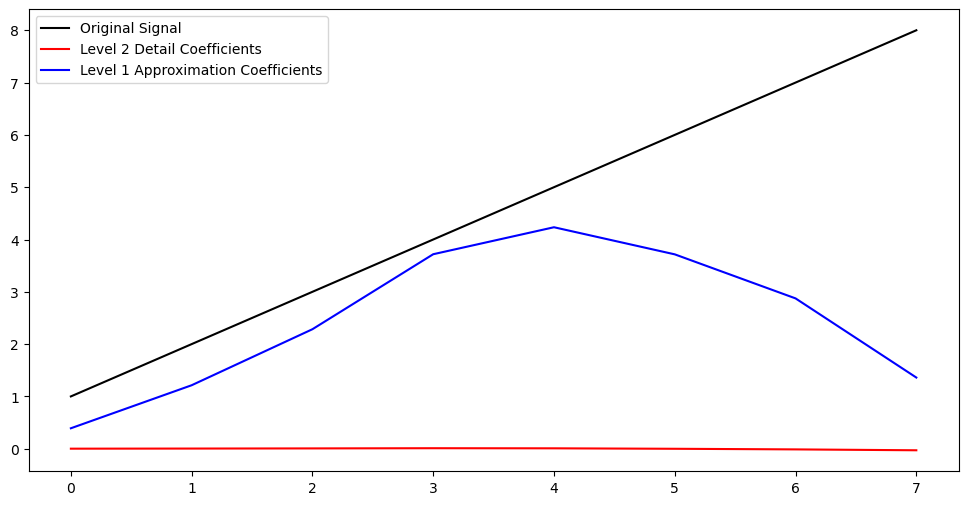

In [10]:
# Построение графика вейвлет-сигнала
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='Original Signal', color='black')
ax.plot(signal_level2, label='Level 2 Detail Coefficients', color='red')
ax.plot(signal_level1, label='Level 1 Approximation Coefficients', color='blue')
ax.legend()
plt.show()

In [11]:
# Создание сигнала
x = np.linspace(0, 1, num=1024)
y = np.sin(2 * np.pi * 10 * x) + np.sin(2 * np.pi * 50 * x)

In [12]:
# Разбиение сигнала на компоненты различных масштабов и уровней разрешения
wavelet = 'db4'
levels = 5
coeffs = pywt.wavedec(y, wavelet, level=levels)

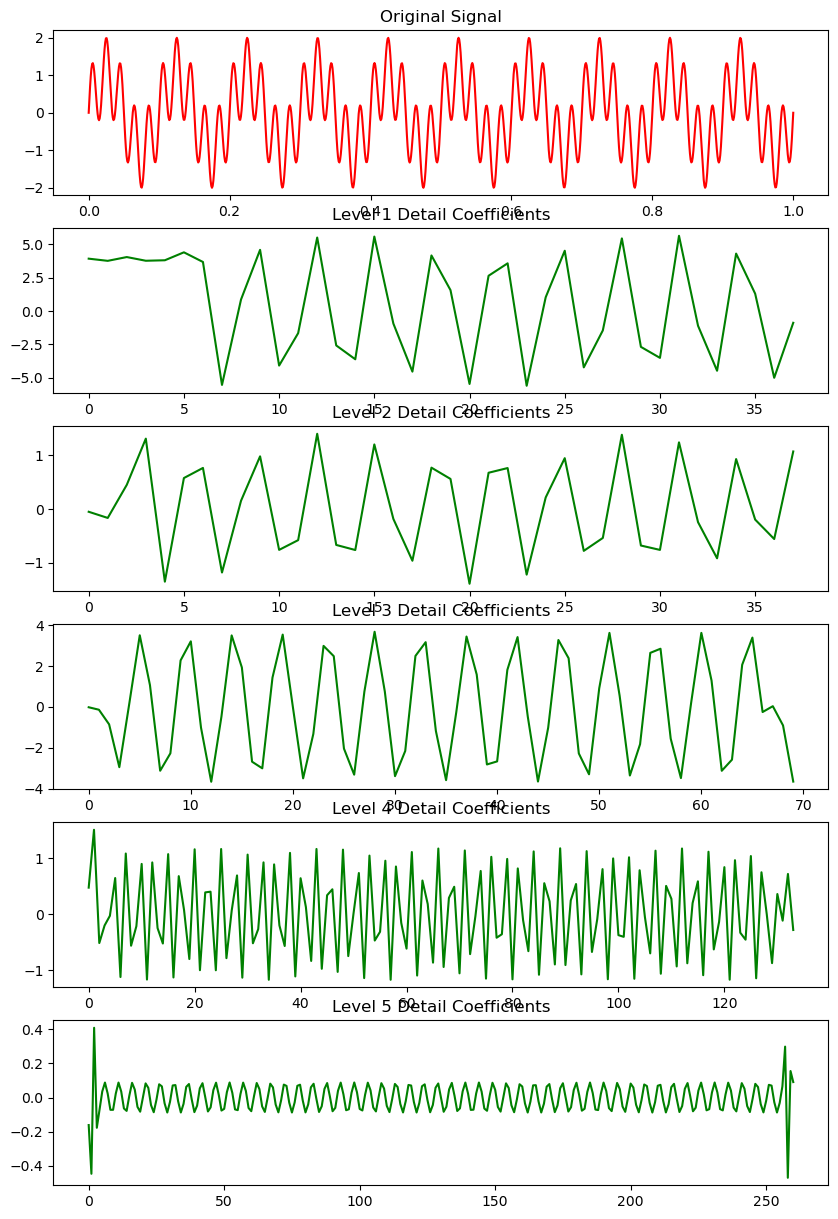

In [13]:
# Анализ каждой компоненты с помощью выбранного вейвлета
fig, axs = plt.subplots(levels + 1, 1, figsize=(10, 15))
axs[0].plot(x, y, 'r')
axs[0].set_title('Original Signal')
for i in range(levels):
    axs[i + 1].plot(coeffs[i], 'g')
    axs[i + 1].set_title('Level ' + str(i + 1) + ' Detail Coefficients')

In [15]:
# Построение коэффициентов преобразования
reconstructed_signal = pywt.waverec(coeffs, wavelet)

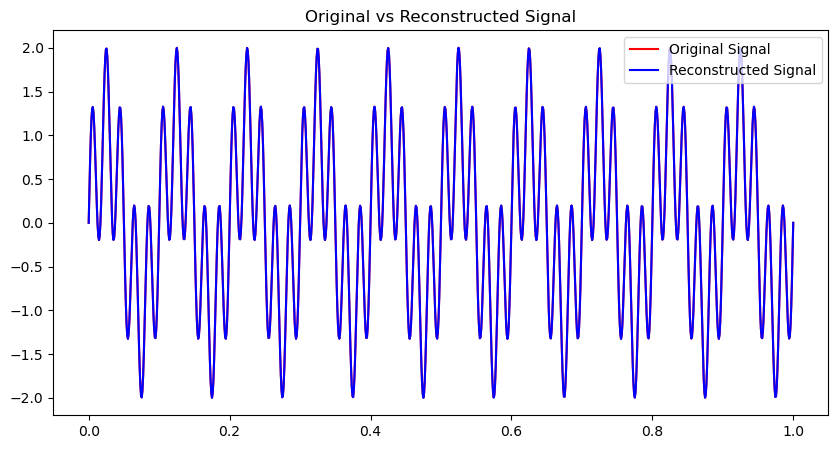

In [16]:
# Восстановление сигнала из полученных коэффициентов
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r', label='Original Signal')
plt.plot(x, reconstructed_signal, 'b', label='Reconstructed Signal')
plt.legend()
plt.title('Original vs Reconstructed Signal')
plt.show()